In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

penguins = pd.read_csv('penguins_size.csv')

penguins.dropna(inplace=True)
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


<Axes: xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

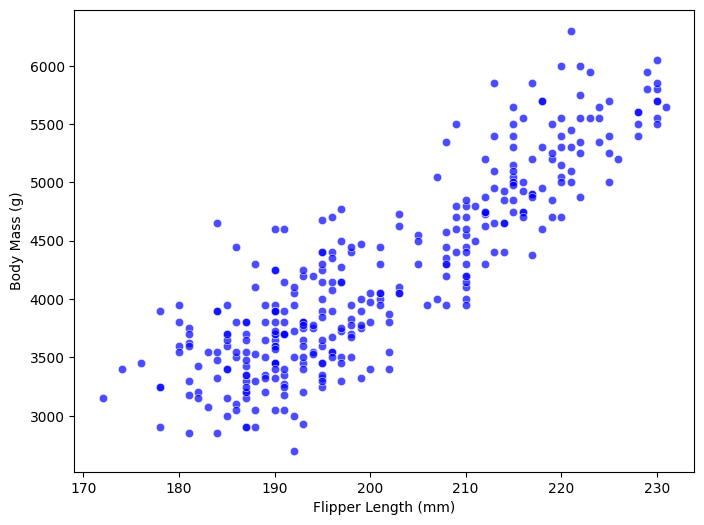

In [2]:
plt.figure(figsize=(8,6))
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")


sns.scatterplot(x="flipper_length_mm",y="body_mass_g",data=penguins,color="blue",alpha=0.7)

In [3]:
from sklearn.linear_model import LinearRegression


linear_regression = LinearRegression()
data = np.array(penguins.flipper_length_mm).reshape(-1,1)
# reshapes data into a 1D arrat

target = penguins.body_mass_g

linear_regression.fit(data,target)

LinearRegression()

In [4]:
linear_regression.coef_

# this is the expected value of the slope

array([50.12002241])

In [5]:
intercept = linear_regression.intercept_
intercept

-5865.81791722159

In [6]:
def linear_model_body_mass(flipper_length,slope,intercept_body_mass):
    expected_body_mass = slope*flipper_length + intercept_body_mass
    return expected_body_mass

flipper_length_range = np.linspace(penguins.flipper_length_mm.max(), penguins.flipper_length_mm.min(),num=300)
predicted_body_mass = linear_model_body_mass(flipper_length_range,linear_regression.coef_[0],intercept,)

Text(0.5, 1.0, '50.12 (g / mm) * flipper length + -5865.82 (g)')

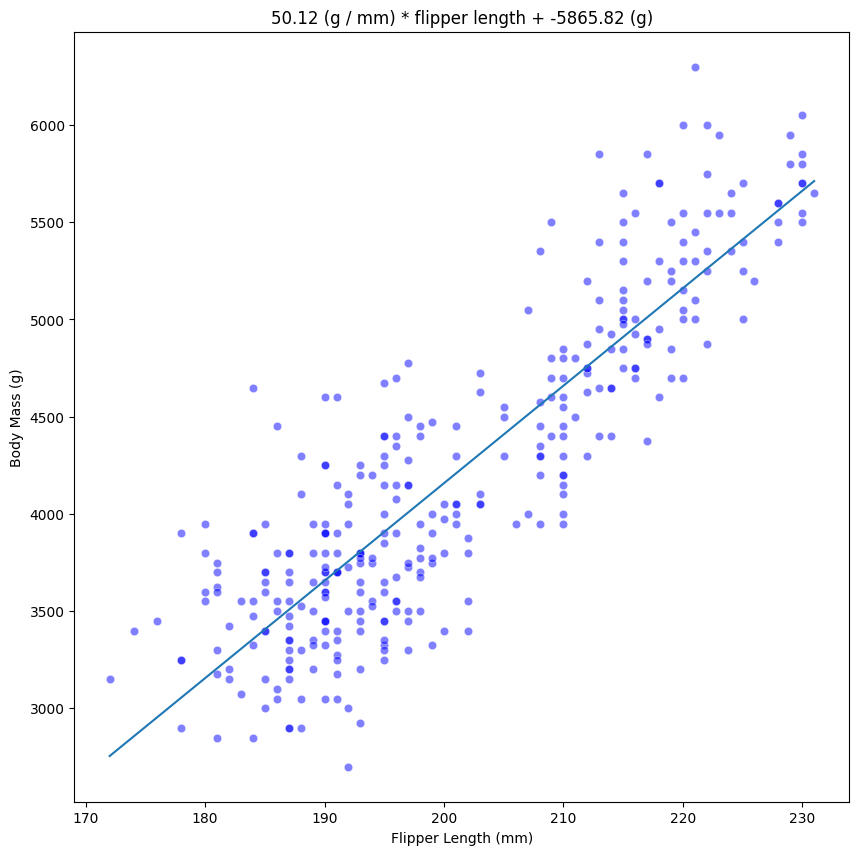

In [7]:
plt.figure(figsize=(10,10))
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"
ax = sns.scatterplot(x="flipper_length_mm",y="body_mass_g",data=penguins,color="blue",alpha=0.5)
ax.plot(flipper_length_range,predicted_body_mass)
ax.set_title(label.format(linear_regression.coef_ [0], intercept))

### Mean Squared error and mean absolute error

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

inferred_body_mass = linear_regression.predict(data)

model_error = mean_squared_error(target,inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 153384.36


In [9]:
model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

# A mean absolute error of 311.52 means that in average, our model make an error of ± 311.52 grams when predicting the body mass of a penguin given its flipper length.

The mean absolute error of the optimal model is 311.52 g
